# Проект : Принятие решений в бизнесе
        
   Описание проекта :
   
    На основе анализа данных крупного интернет-магазинасоставлен список гипотез для увеличения выручки.
     Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

  
  ## Описание данных

Данные для первой части

Файл  Гипотезы :

Hypothesis — краткое описание гипотезы;


Reach — охват пользователей по 10-балльной шкале;


Impact — влияние на пользователей по 10-балльной шкале;


Confidence — уверенность в гипотезе по 10-балльной шкале;


Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.
Чем больше значение Efforts, тем дороже проверка гипотезы.


Данные для второй части

Файл Заказы

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.


Файл  Посетители


date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста



        

##  Изучение общей информации о данных

In [1]:
# импорт библиотек
import pandas as pd               
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
# открываем файлы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')         
orders = pd.read_csv('/datasets/orders.csv')    
visitors = pd.read_csv('/datasets/visitors.csv')  

In [3]:
# общая информация о гипотезах и первые 10 строк таблицы:
hypothesis.info()
hypothesis.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
# общая информация о заказах и первые 10 строк таблицы:
orders.info()
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [5]:
# общая информация о посетителях  и первые 10 строк таблицы:
visitors.info()
visitors.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [6]:
#подсчет явных дубликатов
display(hypothesis.duplicated().sum())

0

In [7]:
#подсчет явных дубликатов
display(orders.duplicated().sum())

0

In [8]:
#подсчет явных дубликатов
display(visitors.duplicated().sum())

0

Изучена первая информация о данных:

    Дубликатов в данных не выявлено .
    
    Пропусков нет.
    
    Названия столбцов таблицы Гипотезы  не соответствуют принятым, необходима замена прописных букв на строчные . 
    
    Даты в таблицах в неверном формате и требуют перевода в формат даты  

In [9]:
#замена типов данных в таблице заказы  
orders['date'] = pd.to_datetime(orders['date'])
display(orders['date'])

0      2019-08-15
1      2019-08-15
2      2019-08-15
3      2019-08-15
4      2019-08-15
          ...    
1192   2019-08-14
1193   2019-08-14
1194   2019-08-14
1195   2019-08-14
1196   2019-08-15
Name: date, Length: 1197, dtype: datetime64[ns]

In [10]:
#замена типов данных в таблице посетители
visitors['date'] = pd.to_datetime(visitors['date'])
display(visitors['date'])

0    2019-08-01
1    2019-08-02
2    2019-08-03
3    2019-08-04
4    2019-08-05
        ...    
57   2019-08-27
58   2019-08-28
59   2019-08-29
60   2019-08-30
61   2019-08-31
Name: date, Length: 62, dtype: datetime64[ns]

In [11]:
hypothesis.columns = map(str.lower, hypothesis.columns)
display(hypothesis.head(10))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [12]:
orders.columns = [x.replace('Id', '_id') for x in orders.columns.values]

In [13]:
# Чтобы часть столбцов в дальнейшем не скрывалась, настроим принудительное отображение
pd.set_option('display.max_colwidth', None)

## Часть 1. Приоритизация гипотез.

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [14]:
hypothesis['ICE']=(hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']
hypothesis_1=hypothesis.sort_values( by='ICE',ascending=False)
display(hypothesis_1[['hypothesis','ICE']])

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [15]:
hypothesis['RICE']=(hypothesis['reach']*hypothesis['impact']* hypothesis['confidence'])/ hypothesis['efforts']
hypothesis_2=hypothesis.sort_values( by='RICE',ascending=False)
display(hypothesis_2[['hypothesis','RICE']])

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Выводы : 
При применении разных фреймворков приоритизации получили несколько разные результаты 

- в лидерах в обоих методах гипотезы 7 ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок") и 0("Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей") 
 
- Гипотеза 8("Запустить акцию, дающую скидку на товар в день рождения"), лидирующая в ICE относится ко всем пользователям , но не одномоментно, поэтому  в RICE она уходит на 5-е место.
 
- Гипотеза 2(" Добавить блоки рекомендаций товаров на  сайт интернет магазина, чтобы повысить конверсию и средний чек заказа") расчитана на охват большой доли пользователей. В  RICE она перемещается на 2-е место 

## Часть 2. Анализ A/B-теста

In [16]:
orders.head(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [17]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [18]:
display(f'Кол-во строк: {orders.shape[0]}')
display(f'Кол-во уникальных пользователей: {orders.visitor_id.nunique()}')

'Кол-во строк: 1197'

'Кол-во уникальных пользователей: 1031'

In [19]:
#Проверим, есть ли пользователи, которые попали в обе группы
orders.groupby('visitor_id')['group'].nunique().sort_values(ascending = False)

visitor_id
2654030115    2
3891541246    2
3941795274    2
1404934699    2
351125977     2
             ..
1476256851    1
1476741193    1
1484903144    1
1485964287    1
4283872382    1
Name: group, Length: 1031, dtype: int64

In [20]:
users_2_groups = orders.groupby('visitor_id')['group'].nunique().reset_index().query('group > 1')['visitor_id']
display(users_2_groups.count())
users_2_groups

58

2          8300375
44       199603092
51       232979603
55       237748145
66       276558944
84       351125977
97       393266494
114      457167155
119      471551937
122      477780734
192      818047933
236      963407295
299     1230306981
311     1294878855
316     1316129916
318     1333886533
340     1404934699
386     1602967004
393     1614305549
402     1648269707
406     1668030113
422     1738359350
436     1801183820
469     1959144690
487     2038680547
491     2044997962
569     2378935119
591     2458001652
614     2579882178
619     2587333274
622     2600415354
639     2654030115
648     2686716486
661     2712142231
662     2716752286
677     2780786433
710     2927087541
715     2949041841
718     2954449915
744     3062433592
784     3202540741
792     3234906277
884     3656415546
897     3717692402
909     3766097110
917     3803269165
932     3891541246
950     3941795274
954     3951559397
957     3957174400
958     3963646447
960     3972127743
963     3984

In [21]:
orders= orders.query('visitor_id  not in @users_2_groups')
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


#### график кумулятивной выручки по группам.

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [23]:
#Получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transaction_id' : pd.Series.nunique, 
                                          'visitor_id' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [24]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [25]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


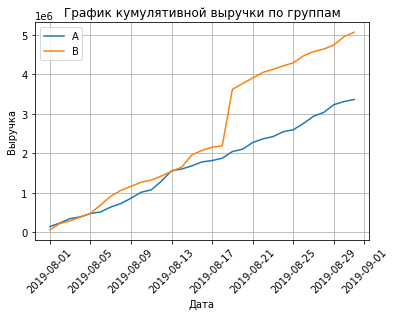

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Выручка')
plt.grid()
plt.legend()
plt.show()

  Выручка почти равномерно увеличивается в течение всего теста.
  Наблюдается резкий скачек в графике у группы В, возможно имеют место аномально большое количество заказов или аномально высокий средний чек 2019-08-18


#### график кумулятивного среднего чека по группам.

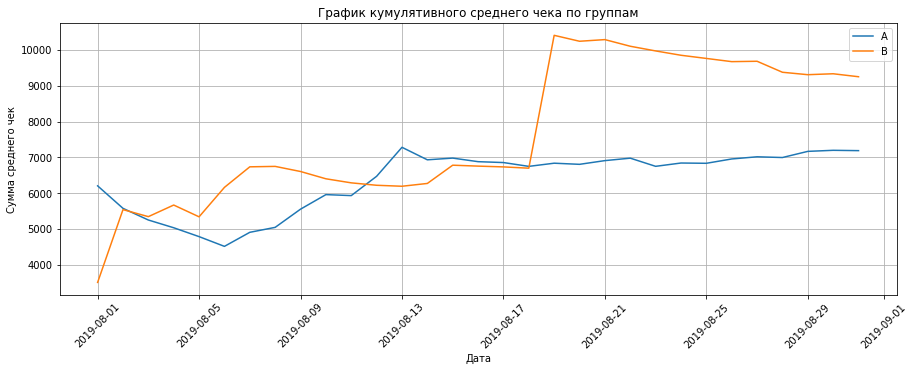

In [27]:
 # разделим кумулятивную выручку на кумулятивное число заказов.

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Сумма среднего чек')
plt.legend() 
plt.show()

 #### график относительного изменения кумулятивного среднего чека группы B к группе A.


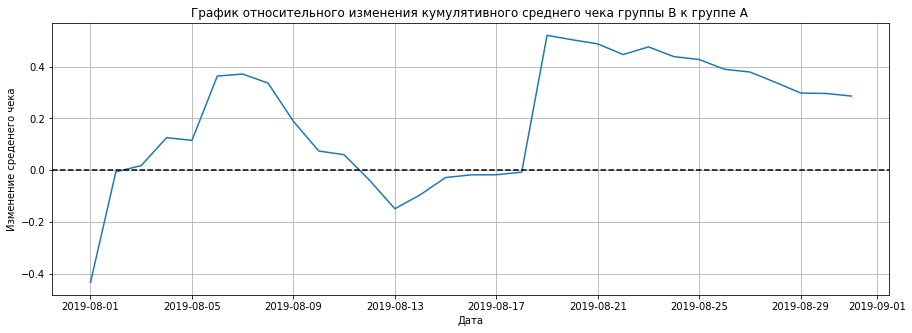

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A ')
plt.xlabel('Дата')
plt.ylabel('Изменение среденего чека')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') ;


#### график кумулятивного среднего количества заказов по группам.

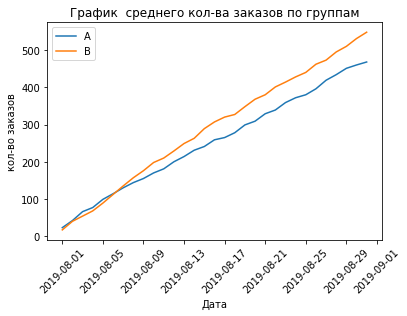

In [29]:
# Строим график заказов группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'], label='A')

# Строим график заказов группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'], label='B')
plt.title('График  среднего кол-ва заказов по группам')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('кол-во заказов')
plt.legend()
plt.show()

#### график относительного изменения кумулятивного среднего количества заказов группы B к группе A. 

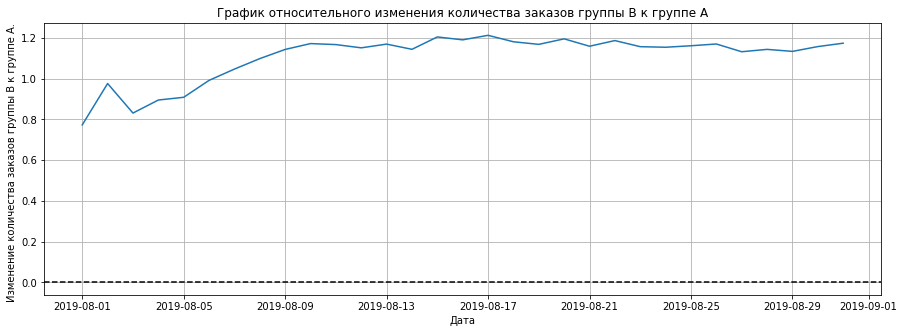

In [30]:
# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['ordersA']-1))
plt.title('График относительного изменения количества заказов группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение количества заказов группы B к группе A.  ')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()



группа В стабильно лучше А 

#### точечный график количества заказов по пользователям

In [31]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['user_id', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


в таблице встречается аномальное число заказов 5 и более

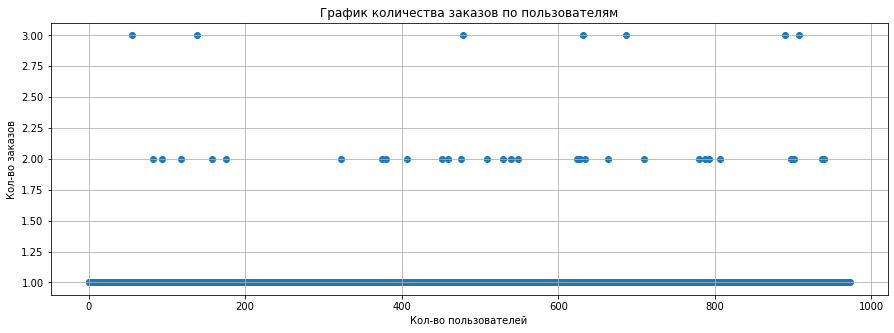

In [32]:
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()


Большинство пользователей совершают по 1 заказу , 2 заказа  у гораздо меньшего числа пользователей , больше 3 заказов совершают очень мало пользователей , возможно стоит отнести их к выбросам 

#### Определим  95-й и 99-й перцентили количества заказов на пользователя. 
Выберем границу для определения аномальных пользователей

In [33]:
np.percentile(ordersByUsers['orders'], [ 95, 99])

array([1., 2.])

 95% пользователей совершают не более 1 заказа , 99% совершают  2 заказов , аномальным будет всё, что  более этого.


#### точечный график стоимостей заказов.

In [34]:
revenueByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'revenue': 'sum'})
)

revenueByUsers.columns = ['user_id', 'revenue']

display(revenueByUsers.sort_values(by='revenue', ascending=False).head(10))

,user_id,revenue
440,1920142716,1294500
477,2108080724,202740
300,1307669133,92550
202,888512513,86620
176,759473111,72000
938,4133034833,67990
687,2988190573,67190
267,1164614297,66350
25,148427295,65710
200,887908475,60450


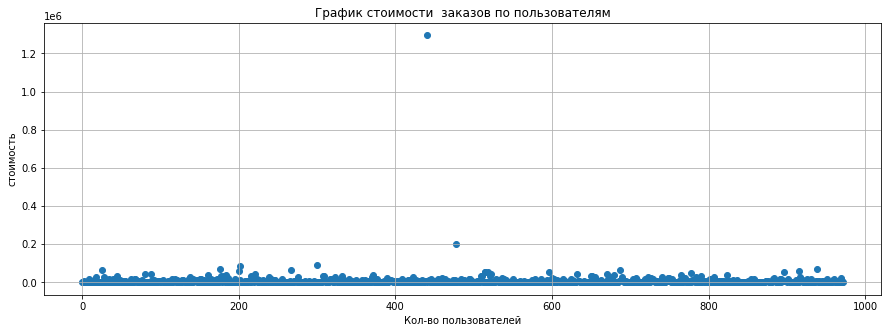

In [35]:
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимости  заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('стоимость')
x_values = pd.Series(range(0, len(revenueByUsers)))
plt.scatter(x_values, revenueByUsers['revenue']) 
plt.show()

#### Определим  95-й и 99-й перцентили стоимости  заказов на пользователя. 
Выберем границу для определения аномальных пользователей  по стоимости заказов

In [36]:
np.percentile(revenueByUsers['revenue'], [ 95, 99])

array([28910., 59082.])

заказы стоимостью выше чем   59082 составляют менее 1 %  считаем их выбросами  

####  Определим статистическую значимость различий в среднем числе заказов на пользователя  в  группах по «сырым» данным — без удаления аномальных пользователей.

In [37]:
# взглянем на исходные таблицы
orders.sample()


,transaction_id,visitor_id,date,revenue,group
765,1457259561,2421265884,2019-08-07,990,B


In [38]:
visitors.sample()

,date,group,visitors
28,2019-08-29,A,577


In [39]:
# подготовим данные 
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [40]:
# Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [41]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

За нулевую гипотезу H0 примем - статистически значимых различий между  между группами A и B нет.
Тогда альтернативная гипотеза Н1 - статистически значимые различия между группами A и B есть.

Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1. Округлим до трёх знаков после запятой.

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [42]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

display("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

display("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

'0.011'

'0.160'

p-value = 0.011 ,меньше 0.05. Поэтому нулевую гипотезу о том, что статистически значимых различий  между группами нет, - отвергаем.Статистические различия в среднем числе заказов между группами есть 
Относительный прирост группы B равен 16 % — второе число в выводе.


####  Определим статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

 Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами:

In [43]:
display('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'0.829'

'0.287'

P-value= 0.83,что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.Наблюдаемое различие среднего чека группы B в 28 % выше  среднего чека группы A не является статистически значимым
Предположительно,  большинство дорогих заказов попали  в группу В

####   Подготовим очищенные от аномалий данные 
Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 60 000 рублей. Так мы уберём  до 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

 Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 60 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [44]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 60000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0])




1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64

15

Всего аномальных пользователей 15

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 


Сначала подготовим выборки количества заказов по пользователям по группам теста:



In [45]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [46]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.006
Относительный показатель 'B' и 'A' = 0.191


p-value = 0.006 меньше 0.05.значит , нулевую гипотезу  - отвергаем.  По «очищенным» данным в среднем кол-ве заказов между группами  A и B есть статистически значимые различия. Относительный выигрыш группы "B" над "A" равен более  19 %  .


#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.


Нулевая гипотеза H0 : "статистически значимых различий в средних чеках между группами нет".
Альтернативная гипотеза Н1 - статистически значимые различия есть.

In [47]:
print('{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.827
-0.017


P-value = 0.83, значительно больше 0.05. Поэтому можем считать, что в среднем чеке нет различий (как и с "сырыми" данными).Различия не являются статистически значимыми А вот средний чек группы B оказался незначительно (на 1.7%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше  на 29 %,так повлияли на результаты аномальные заказы с большими суммами.


#### Pешение по результатам теста . 


Варианты решений: 


1. Остановить тест, зафиксировать победу одной из групп.

2. Остановить тест, зафиксировать отсутствие различий между группами.

3. Продолжить тест.


Имеющиеся факты:
    
-Статистические различия в среднем числе заказов между группами есть .Относительный прирост группы B равен 16% по «сырым» данным.
 По «очищенным» данным в среднем кол-ве заказов между группами A и B есть статистически значимые различия. Относительный выигрыш группы "B" над "A" равен более 19 % . В " сырых данных " процент был выше , значит большинство дорогих заказов в группе В
    
    
-Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
Средний чек группы B оказался незначительно (на 1%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше на 29 %,так повлияли на результаты аномальные заказы с большими суммами. 

-Графики различия  между группами сообщают, что результаты группы B лучше группы A по всем критериям

Основываясь на результатах проведенного А/В теста, рекомендую остановить тест и зафиксировать победу группы В по показателю конверсии. Рекомендую отделу маркетинга  начать работу по стимуляции к увеличению среднего чека.
